In [1]:
import torch.nn as nn
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import numpy as np

# 1. Transposed Convolution 

#### Useful Links:

* PyTorch API: torch.nn.ConvTranspose2d https://pytorch.org/docs/master/nn.html#torch.nn.ConvTranspose2d

* Youtube cs231n: https://www.youtube.com/watch?v=nDPWywWRIRo&list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv&index=11  (23:00 - 30:00)

#### An Example by using  torch.nn.ConvTranspose2d:

![trans_conv_example](./img/trans_conv_example.jpg)

In [2]:
m = nn.ConvTranspose2d(in_channels=1, out_channels=1, kernel_size=3, stride=1)

input = torch.tensor([[1., 1.], [1., 1,]])
input = input.view(1,1,2,2)

output = m(input)
print('the outpur shape is {} \n'.format(output.shape))

print('weight: \n{}'.format(m.weight))
print('bias: \n{} \n'.format(m.bias))

print('output: \n{} \n'.format(output))

print('k5 + k4 + k2 + k1 + bias = {}'.format((m.weight[0,0,1,1] + m.weight[0,0,1,0] + m.weight[0,0,0,1] + m.weight[0,0,0,0] + m.bias[0]).item()))
print('Output value: {}'.format(output[0,0,1,1]))

the outpur shape is torch.Size([1, 1, 4, 4]) 

weight: 
Parameter containing:
tensor([[[[ 0.3301, -0.2587,  0.3200],
          [-0.2919,  0.1703, -0.0400],
          [ 0.3212, -0.2086, -0.2380]]]], requires_grad=True)
bias: 
Parameter containing:
tensor([-0.1337], requires_grad=True) 

output: 
tensor([[[[ 0.1964, -0.0623, -0.0724,  0.1863],
          [-0.0955, -0.1839,  0.0579,  0.1463],
          [-0.1044, -0.1427, -0.4500, -0.4117],
          [ 0.1875, -0.0211, -0.5803, -0.3717]]]],
       grad_fn=<SlowConvTranspose2DBackward>) 

k5 + k4 + k2 + k1 + bias = -0.1839059740304947
Output value: -0.1839059740304947


# 2. torchvision.models.segmentation.fcn_resnet101

#### reference:

* FCN-RESNET101: https://pytorch.org/hub/pytorch_vision_fcn_resnet101/

* PyTorch API: https://pytorch.org/docs/master/torchvision/models.html#fully-convolutional-networks

* https://blog.csdn.net/heiheiya/article/details/102967124

In [3]:
model = models.segmentation.fcn_resnet101(pretrained=True)

In [73]:
input_image = plt.imread('data/test_img.jpg')
print('input_image shape is: {}'.format(input_image.shape))

input_image shape is: (549, 544, 3)


In [74]:
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor =preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

In [45]:
out = model(input_batch)['out']

In [75]:
print('the shape of input is: {}'.format(out.shape))
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()

the shape of input is: torch.Size([1, 21, 549, 544])


In [76]:
def decode_segmap(image, nc=21):
    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    
    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]
    rgb = np.stack([r, g, b], axis=2)
    return rgb

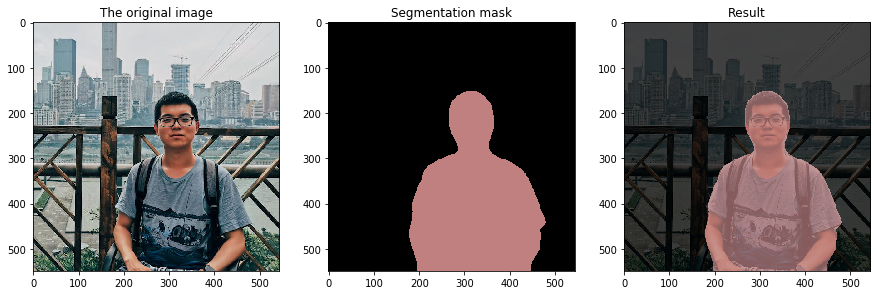

In [77]:
rgb = decode_segmap(om)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('The original image')
plt.imshow(input_image)

plt.subplot(1,3,2)
plt.title('Segmentation mask')
plt.imshow(rgb)

alpha = 0.7
img_show = (input_image * (1 - alpha) + rgb* alpha).astype(np.uint8)
plt.subplot(1,3,3)
plt.title('Result')
plt.imshow(img_show)

plt.show()